# SVM

## Exemplo: Reconhecimento Facial

Como exemplo de SVM em ação, vamos dar uma olhada no problema de reconhecimento de faces. Nós usaremos o dataset rotulado _Faces in the Wild_, composto por milhares de fotos de várias figuras públicas. Podemos pegar esses dados usando Scikit-Learn:

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Plotando algumas amostras para ter ideia do contexto em que estamos trabalhando:

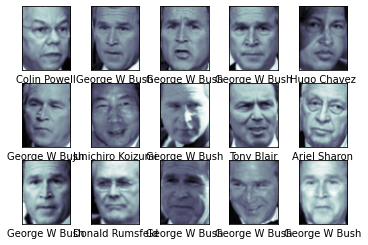

In [69]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Cada imagem contem 64x47 pixels (aproximadamente 3,000). Nós poderiamos simplesmente usar a intensidade de cada pixel como feature, mas geralmente, é mais eficiente usar alguns métodos de pré-processamente para extrair características mais significativas. Aqui, nós usaremos as técnicas _Principal Component Analysis (PCA)_ para extrair os 150 componentes mais relevantes e usá-los como features de cada amostra. Podemos fazer isso de modo simples juntando o pré-processamento e a classificação em um único _pipeline_:

In [70]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


Para testar a saída de nosso classificador, vamos dividir os dados em treinamento e teste;

In [2]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finalmente, podemos usar uma validação cruzada com grid search (busca exaustiva) para explorar a combinação dos parâmetros. Aqui, ajustaremos $C$ (que controla a suavidade das bordas) e gamma (que controla o tamanho do kernel da função de base radial) para encontrar o melhor modelo:

In [4]:
ytrain

array([3, 6, 3, ..., 3, 7, 1])

In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 42s, sys: 3.71 s, total: 1min 46s
Wall time: 17.8 s
{'svc__C': 10, 'svc__gamma': 0.001}


O valor ótimo fica entre os valores médios do nosso grid; se caisse nos extremos, seria interessante expandir esse grid para novos valores e nos certificarmos que escolhemos os valores ótimos.

Agora que temos esse modelo validado, podemos estimar os rótulos do conjunto de teste, os quais ainda não foram vistos pelo modelo.

In [73]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Vamos dar uma olhada a algumas das imagens com seus respectivos rótulos estimados:

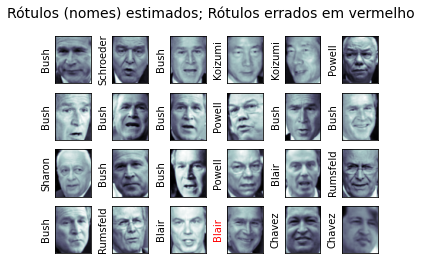

In [74]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Rótulos (nomes) estimados; Rótulos errados em vermelho', size=14);

Nessa pequena amostragem, o estimador ótimo classificou errado apenas uma face (Bush foi confundido com Blair). Podemos ter uma ideia melhor da performance do modelo usando o relatório de classificação, que lista as estatísticas para cada rótulo:

In [75]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Podemos mostrar também a matriz de confusão:

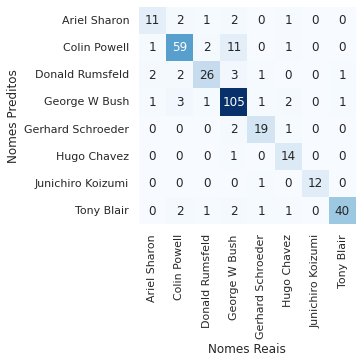

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,cmap=plt.cm.Blues)
plt.xlabel('Nomes Reais')
plt.ylabel('Nomes Preditos');

Para casos reais de classificação de pessoas, onde o rosto já não esteja selecionado, precisariamos usar métodos mais eficientes de extração de características, ou então métodos mais poderosos, como _Deep Learning_.

## Exercício:

1. Baixar alguns datasets de classificação do repositório [Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) do Scikit-Learn e classificá-los usando SVM. Verificar se funciona melhor com SVM linear ou com kernel RBF, e testar diferentes valores de $C$.

#### Importando bibliotecas

In [26]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
from sklearn.preprocessing import StandardScaler

### Dataset Breast Cancer

### RBF

In [5]:
X, y = load_breast_cancer(return_X_y= True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = SVC(kernel='rbf', class_weight='balanced')

In [8]:
param_grid = {'C': [0.1, 1, 10, 50],
              'gamma': [0.001, 0.0001, 0.00001, 0.0005]}
grid = GridSearchCV(model, param_grid)
grid.fit(x_train, y_train)
grid.best_estimator_

SVC(C=10, class_weight='balanced', gamma=0.0001)

In [9]:
model = grid.best_estimator_
yfit = model.predict(x_test)
model.get_params

<bound method BaseEstimator.get_params of SVC(C=10, class_weight='balanced', gamma=0.0001)>

In [11]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [13]:
cm = confusion_matrix(y_test, yfit)

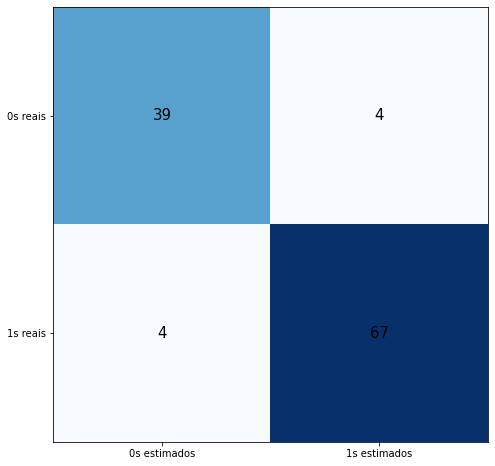

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s estimados', '1s estimados'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s reais', '1s reais'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',  size=15)
plt.show()

### LINEAR

In [15]:
model = SVC(kernel='linear')

In [16]:
param_grid = {'C': [10, 50, 100, 150]}
grid = GridSearchCV(model, param_grid)
grid.fit(x_train, y_train)
grid.best_estimator_

SVC(C=100, kernel='linear')

In [17]:
model = grid.best_estimator_
yfit = model.predict(x_test)
model.get_params

<bound method BaseEstimator.get_params of SVC(C=100, kernel='linear')>

In [18]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [19]:
cm = confusion_matrix(y_test, yfit)

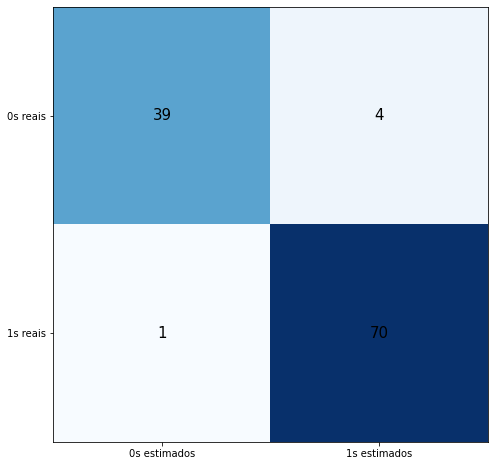

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s estimados', '1s estimados'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s reais', '1s reais'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',  size=15)
plt.show()

### Dataset load digits

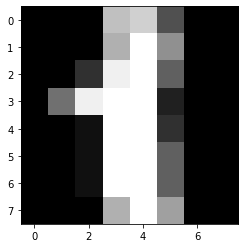

In [23]:
X, y = load_digits(return_X_y=True)
# Visualizando alguns digitos
img = X[1].reshape((8,8)).astype(np.uint8)

imgplot = plt.imshow(img, cmap="gray")
plt.show()

#### RBF

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
model = SVC(kernel='rbf', class_weight='balanced')
param_grid = {'C': [1, 4, 6, 10]}
grid = GridSearchCV(model, param_grid)
grid.fit(x_train, y_train)
grid.best_estimator_

SVC(C=4, class_weight='balanced')

In [48]:
model = grid.best_estimator_
yfit = model.predict(x_test)
model.get_params

<bound method BaseEstimator.get_params of SVC(C=4, class_weight='balanced')>

In [49]:
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       0.97      0.97      0.97        36
           3       1.00      0.97      0.98        29
           4       0.91      1.00      0.95        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.95      0.97      0.96        39
           8       1.00      0.95      0.97        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



In [56]:
cm = confusion_matrix(y_test, yfit)

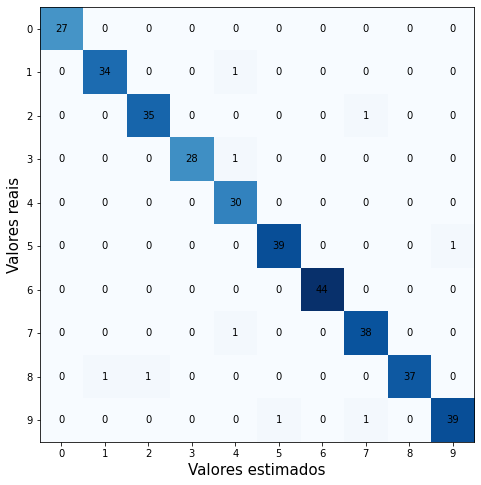

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Valores estimados', fontsize=15, color='black')
ax.set_ylabel('Valores reais', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

#### LINEAR

In [62]:
model = SVC(kernel='linear')
param_grid = {'C': [0.01, 0.03, 0.04,0.05]}
grid = GridSearchCV(model, param_grid)
grid.fit(x_train, y_train)
grid.best_estimator_

SVC(C=0.03, kernel='linear')

In [63]:
model = grid.best_estimator_
yfit = model.predict(x_test)
model.get_params

<bound method BaseEstimator.get_params of SVC(C=0.03, kernel='linear')>

In [64]:
print(classification_report(y_test, yfit))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      1.00      0.96        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.97      0.97      0.97        39
           8       1.00      0.95      0.97        39
           9       0.97      0.95      0.96        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



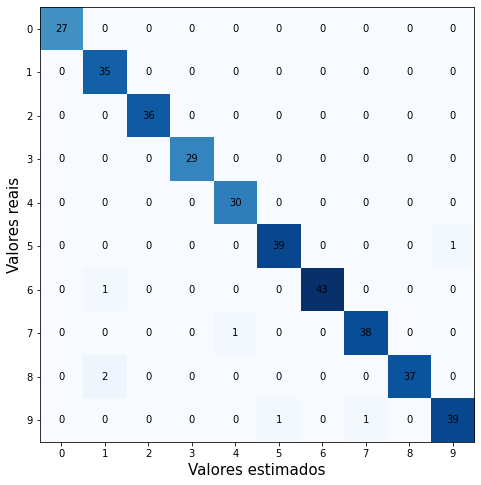

In [65]:
cm = confusion_matrix(y_test, yfit)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Valores estimados', fontsize=15, color='black')
ax.set_ylabel('Valores reais', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()